In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#df = pd.read_csv('/home/eduardo/Graph-creation-with-html/Graph-creation-with-html/resultados/est-dir - parliament_data_by_year.csv')
df = pd.read_csv('est-dir - parliament_data_by_year.csv')

# Clean data - handle missing/empty Tipo values
df['Tipo'] = df['Tipo'].fillna('Unknown')
df['Tipo'] = df['Tipo'].str.strip()

# Standardize case for consistent grouping
df['Tipo'] = df['Tipo'].str.upper()
df['Fonte'] = df['Fonte'].str.title()  # Capitalize first letter

# Convert Ano to datetime for better plotting
df['Ano'] = pd.to_datetime(df['Ano'], format='%Y').dt.year

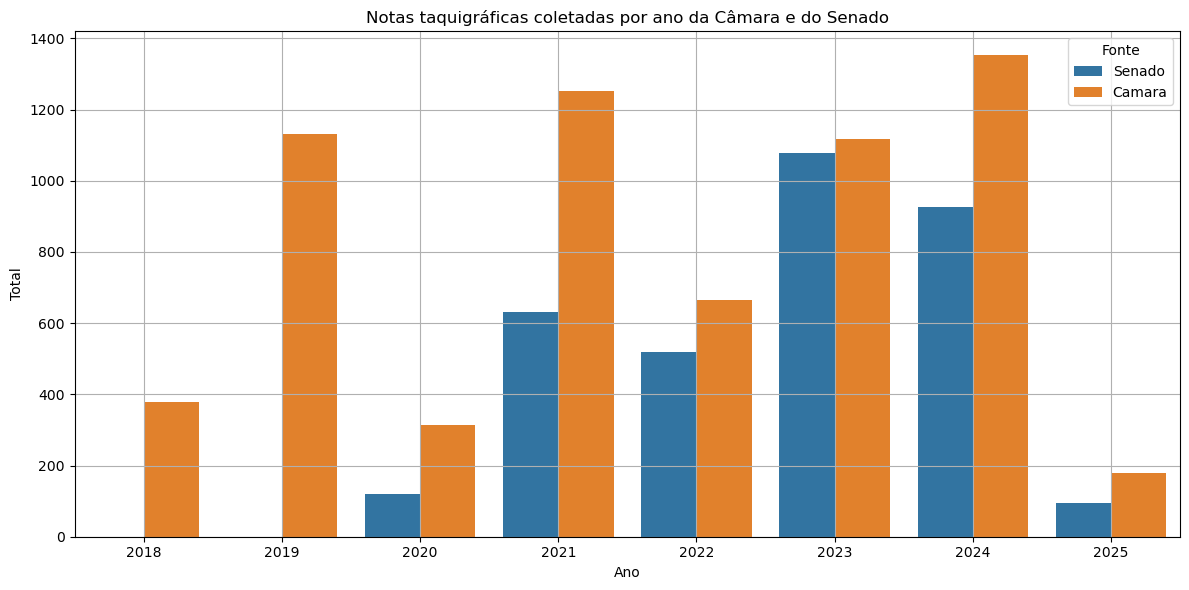

In [2]:
# Load the data
#df = pd.read_csv('est-dir - parliament_data_by_Ano.csv')
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Ano', y='Contador', hue='Fonte', 
             estimator='sum', errorbar=None)
plt.title('Notas taquigráficas coletadas por ano da Câmara e do Senado')
plt.ylabel('Total')
plt.xlabel('Ano')
plt.grid(True)
plt.tight_layout()
plt.savefig('Tabela_tipo_ano.png')
plt.show()

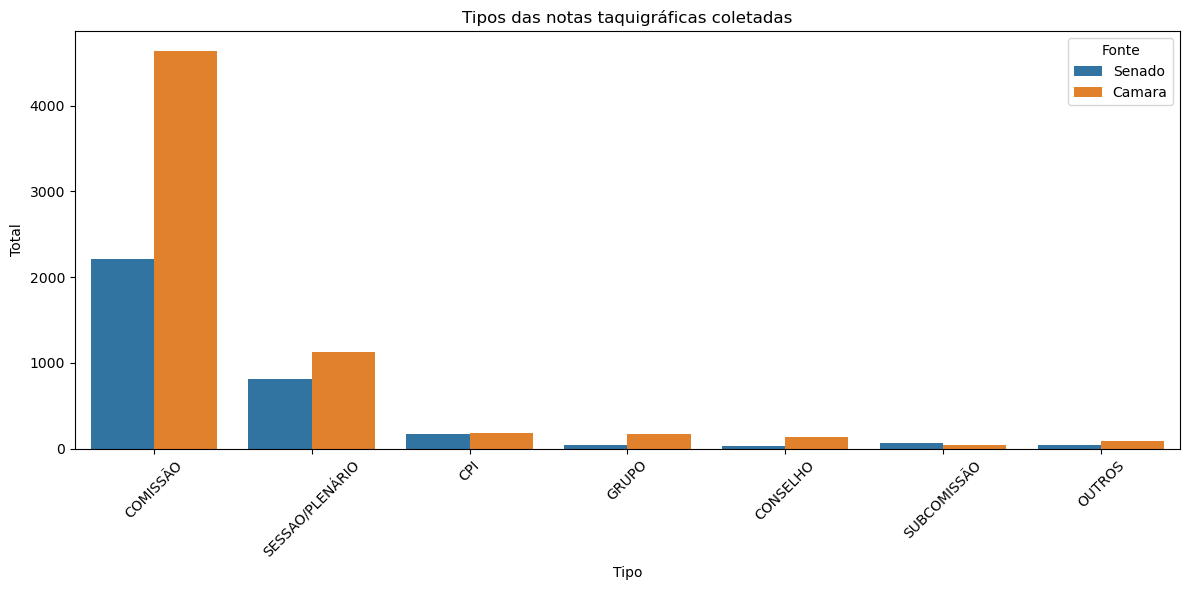

In [3]:
# Get top 10 activity types
tipo_Contadors = df.groupby('Tipo')['Contador'].sum().sort_values(ascending=False)

# Define threshold for considering a category as "small"
threshold = 6  # Keep top 6 categories, group the rest as "Outros"
top_categories = tipo_Contadors.head(threshold).index

# Create a new column for grouped categories
df['Tipo_Grouped'] = df['Tipo'].where(df['Tipo'].isin(top_categories), 'OUTROS')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, 
                x='Tipo_Grouped', 
                y='Contador', 
                hue='Fonte', 
                estimator='sum', 
                errorbar=None,
                order=list(top_categories) + ['OUTROS'])

plt.title('Tipos das notas taquigráficas coletadas')
plt.xticks(rotation=45)
plt.ylabel('Total')
plt.xlabel('Tipo')

# Proper legend handling
plt.legend(title='Fonte')

plt.tight_layout()
plt.savefig('dados_por_ano.png', bbox_inches='tight')  # bbox_inches preserves legend
plt.show()

In [1]:
!pip install python-igraph matplotlib networkx pycairo

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx
file_path = '/home/eduardo/Graph-creation-with-html/Graph-creation-with-html/graphs/camara/grafo_2024.gexf'
nwx = nx.read_gexf(file_path)
graph = ig.Graph.from_networkx(nwx)

In [3]:
current_layout_algorithm = 'fr'
current_show_labels = False
current_node_size = 5
current_edge_width = 0.2
current_figure_size = (15, 15) # Inches
current_output_filename = "grafo_2024_plot_unpacked.png" # or None
current_dpi = 150

In [4]:
layout_algorithm = current_layout_algorithm
show_labels = current_show_labels
node_size = current_node_size
edge_width = current_edge_width
figure_size = current_figure_size
output_filename = current_output_filename
dpi = current_dpi


In [5]:
layout = graph.layout(layout_algorithm)
visual_style = {}
visual_style["layout"] = layout
visual_style["vertex_size"] = node_size
visual_style["edge_color"] = "grey"

In [8]:
if show_labels:
    print("Preparing labels (this can be slow for large graphs)...")
    if "label" in graph.vs.attributes() and any(graph.vs["label"]):
        visual_style["vertex_label"] = graph.vs["label"]
    elif "id" in graph.vs.attributes() and any(graph.vs["id"]):
        visual_style["vertex_label"] = graph.vs["id"]
    else:
        visual_style["vertex_label"] = [str(i) for i in range(graph.vcount())]
    visual_style["vertex_label_size"] = max(6, int(figure_size[0] * 0.4))
    visual_style["vertex_label_dist"] = 1.0
    visual_style["vertex_label_color"] = "black"
else:
    visual_style["vertex_label"] = None
plt.show()

Loading graph from: /home/eduardo/Graph-creation-with-html/Graph-creation-with-html/graphs/camara/grafo_2024.gexf
Graph loaded: 17733 vertices, 58415 edges.
Calculating layout: fr
Layout calculated.
Preparing interactive plot...


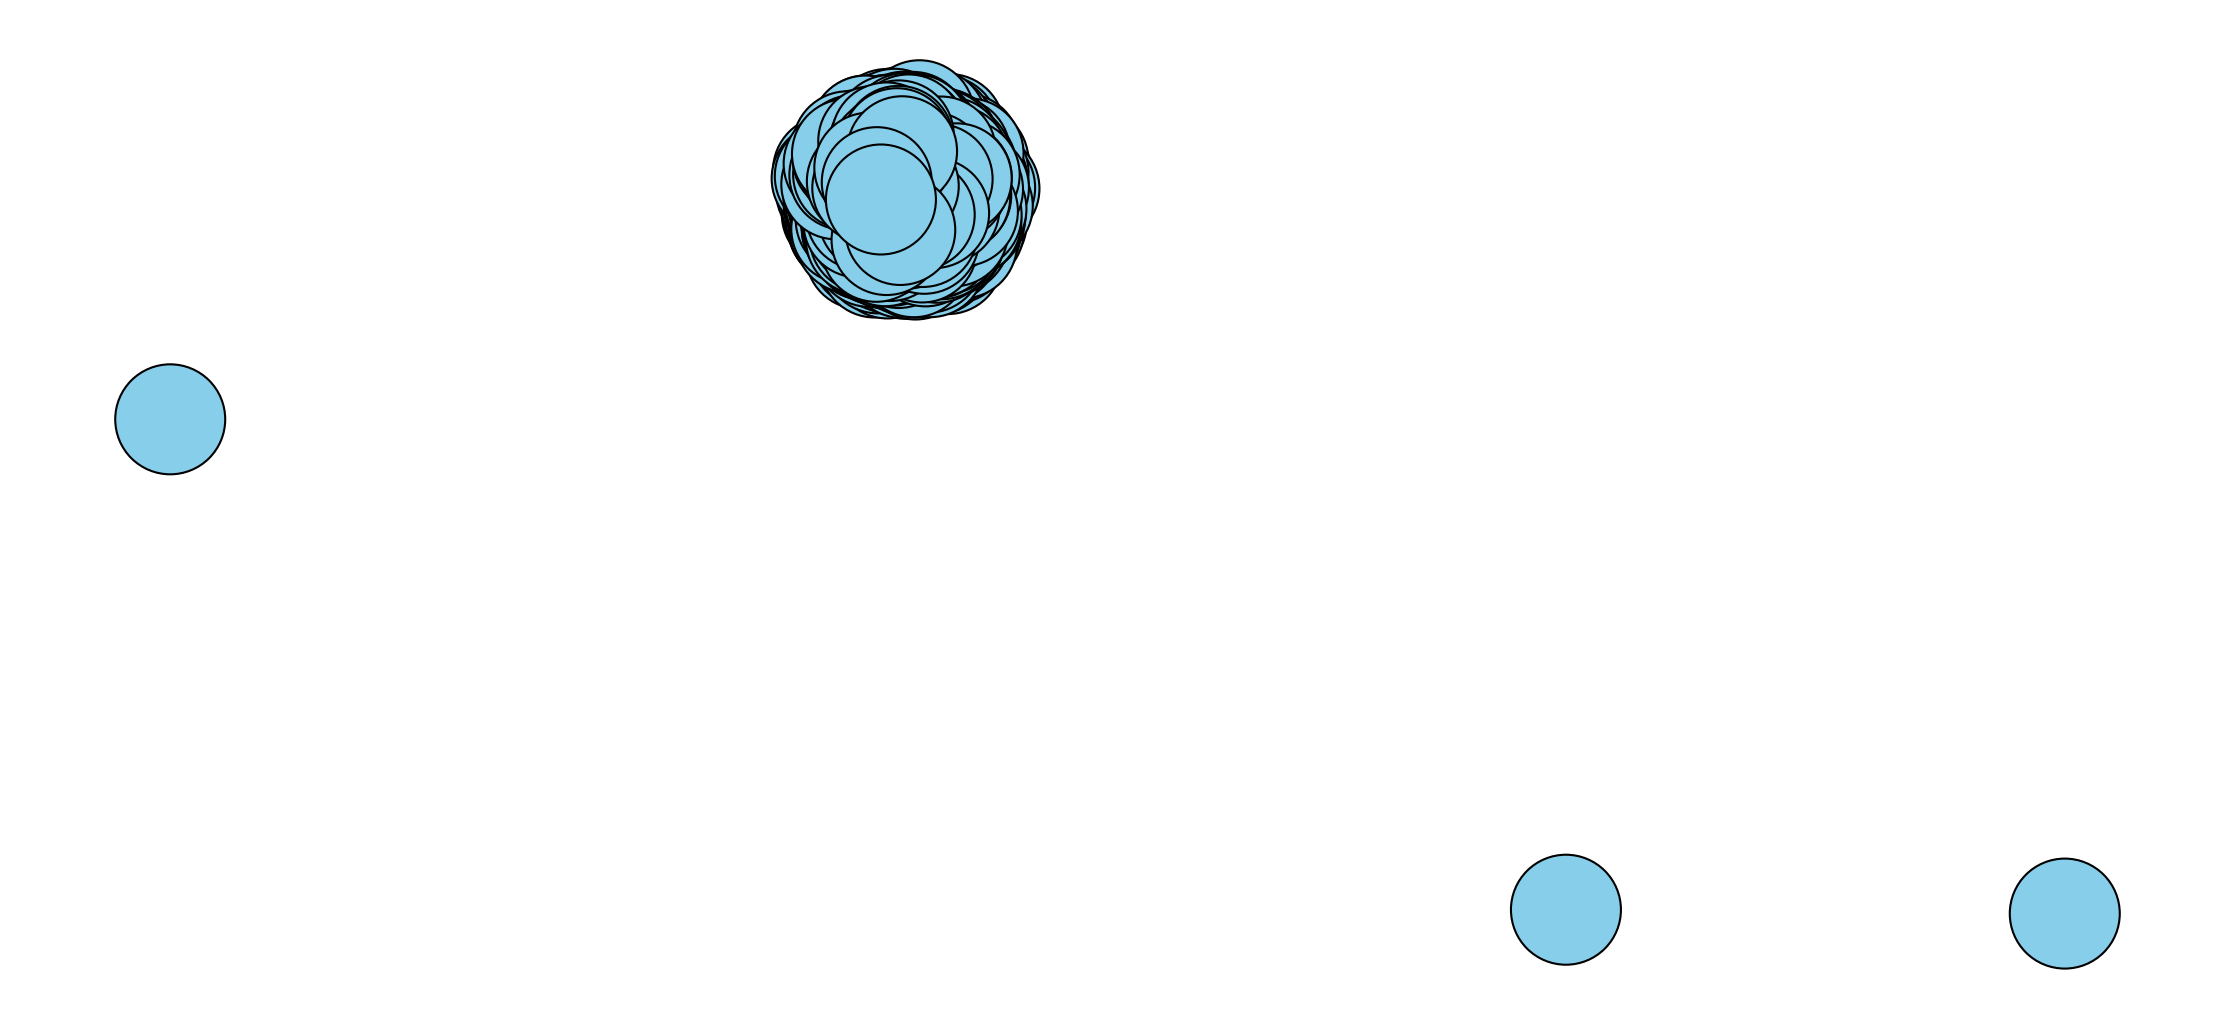

Plot displayed.


In [9]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx
import os # Added import os

# 1. Load Graph
file_path = '/home/eduardo/Graph-creation-with-html/Graph-creation-with-html/graphs/camara/grafo_2024.gexf'
print(f"Loading graph from: {file_path}")
nwx = nx.read_gexf(file_path)
graph = ig.Graph.from_networkx(nwx)
print(f"Graph loaded: {graph.vcount()} vertices, {graph.ecount()} edges.")

# 2. Define Parameters
current_layout_algorithm = 'fr'
current_show_labels = False # Set to True if you want to test labels, but be cautious with large graphs
current_node_size = 5
current_edge_width = 0.2
current_figure_size = (15, 15) # Inches
# current_output_filename = "grafo_2024_plot_unpacked.png" # Not used in this interactive snippet
current_dpi = 150

layout_algorithm = current_layout_algorithm
show_labels = current_show_labels
node_size = current_node_size
edge_width = current_edge_width
figure_size = current_figure_size
# output_filename = current_output_filename # Not used in this interactive snippet
dpi = current_dpi

# 3. Calculate Layout
print(f"Calculating layout: {layout_algorithm}")
layout = graph.layout(layout_algorithm)
print("Layout calculated.")

# 4. Define Visual Style
visual_style = {}
visual_style["layout"] = layout
visual_style["vertex_size"] = node_size
visual_style["vertex_color"] = "skyblue" # Added default vertex color
visual_style["edge_color"] = "grey"
visual_style["edge_width"] = edge_width # Added edge_width

# Handle node colors if 'color' attribute exists in your GEXF and was transferred
if 'color' in graph.vs.attributes() and any(graph.vs['color']):
    # This assumes colors are in a format igraph/matplotlib understands (e.g., names, hex)
    visual_style["vertex_color"] = graph.vs["color"]
    print("Using 'color' attribute for nodes.")

# Handle edge colors if 'color' attribute exists
if 'color' in graph.es.attributes() and any(graph.es['color']):
    visual_style["edge_color"] = graph.es["color"]
    print("Using 'color' attribute for edges.")


# 5. Handle Labels
if show_labels:
    print("Preparing labels (this can be slow for large graphs)...")
    if "label" in graph.vs.attributes() and any(graph.vs["label"]):
        visual_style["vertex_label"] = graph.vs["label"]
    elif "id" in graph.vs.attributes() and any(graph.vs["id"]): # GEXF often uses 'id'
        visual_style["vertex_label"] = graph.vs["id"]
    else:
        visual_style["vertex_label"] = [str(i) for i in range(graph.vcount())]
    visual_style["vertex_label_size"] = max(6, int(figure_size[0] * 0.4))
    visual_style["vertex_label_dist"] = 1.0
    visual_style["vertex_label_color"] = "black"
else:
    visual_style["vertex_label"] = None

# 6. Plot Interactively
print("Preparing interactive plot...")
# For interactive plotting, explicit bbox and margin are usually not needed in visual_style
# as matplotlib handles the figure.
# If visual_style contained 'bbox' or 'margin' from a file-saving setup,
# popping them would be relevant:
# interactive_visual_style = visual_style.copy()
# interactive_visual_style.pop("bbox", None)
# interactive_visual_style.pop("margin", None)
# However, since they were not added, we can use visual_style directly.

fig, ax = plt.subplots(figsize=figure_size, dpi=dpi)
ig.plot(graph, target=ax, **visual_style) # Using visual_style directly
#ax.set_title(f"Graph: {os.path.basename(file_path)} (Layout: {layout_algorithm})") # Used file_path
plt.axis('off')
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()
print("Plot displayed.")


NameError: name 'graph_file_path' is not defined

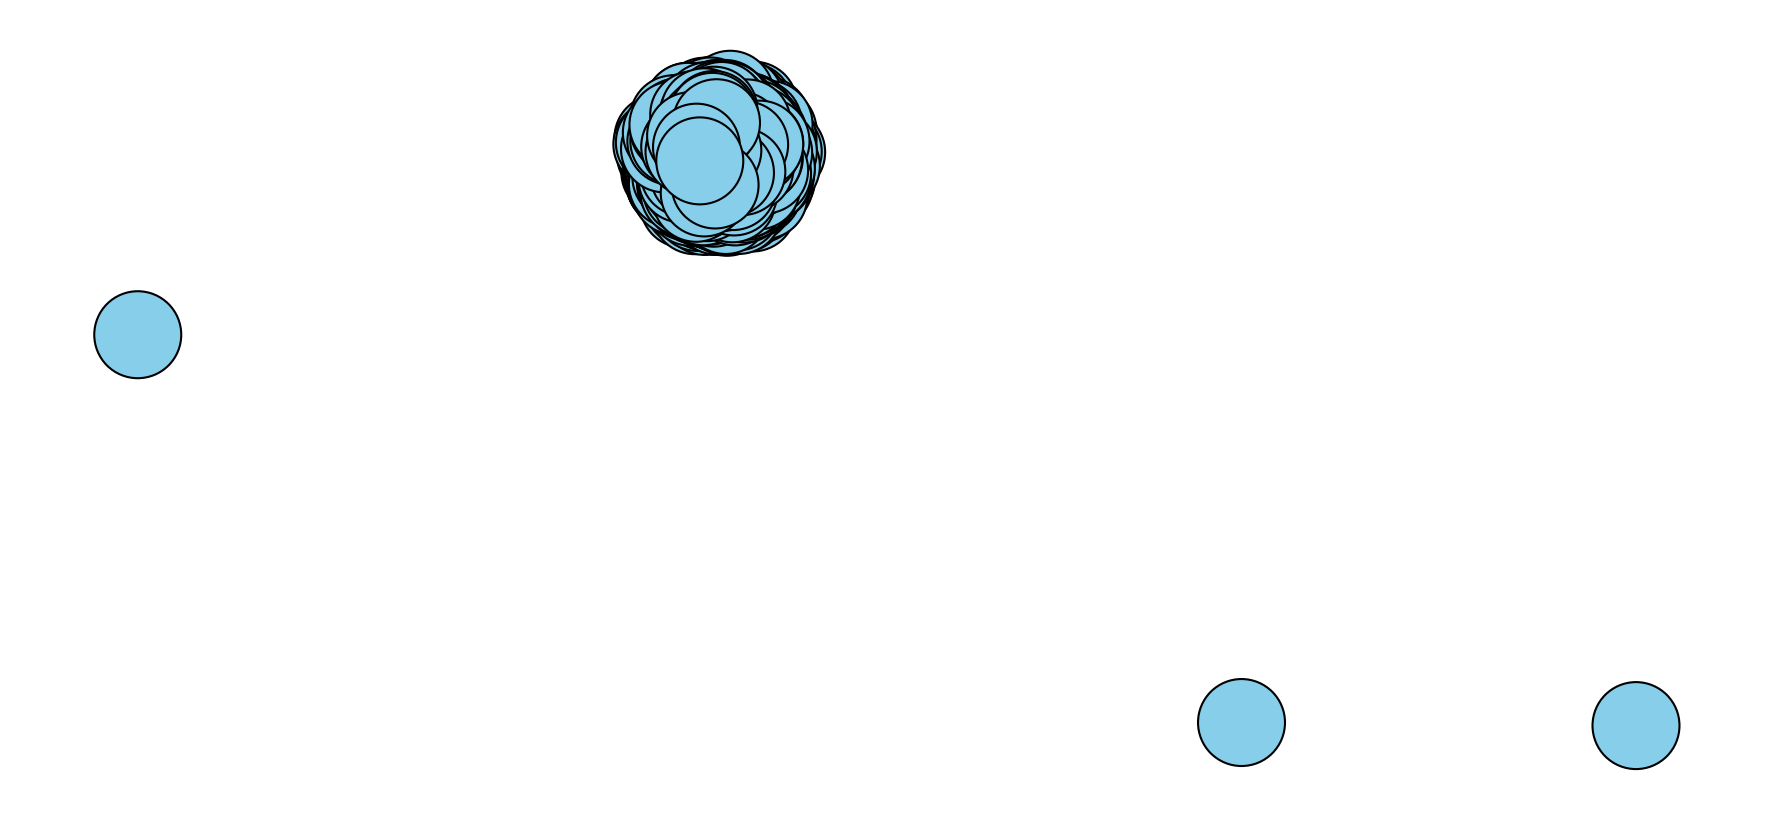

In [10]:
interactive_visual_style = visual_style.copy()
interactive_visual_style.pop("bbox", None) # Remove if present
interactive_visual_style.pop("margin", None) # Remove if present

fig, ax = plt.subplots(figsize=figure_size, dpi=dpi)
ig.plot(graph, target=ax, **interactive_visual_style)
ax.set_title(f"Graph: {os.path.basename(graph_file_path)} (Layout: {layout_algorithm})")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx
import os # Added import os

# 1. Load Graph
file_path = '/home/eduardo/Graph-creation-with-html/Graph-creation-with-html/graphs/camara/grafo_2024.gexf'
print(f"Loading graph from: {file_path}")
nwx = nx.read_gexf(file_path)
graph = ig.Graph.from_networkx(nwx)

layout = graph.layout('auto')

# Plotar o grafo
# Para salvar a imagem, descomente a linha abaixo e especifique o caminho
#igraph.plot(graph, target='/home/ubuntu/grafo_visualizado.png', layout=layout, vertex_label=graph.vs['label'], bbox=(1000, 1000), margin=20)

# Para exibir o grafo interativamente (pode não funcionar em ambientes sem display)
ig.plot(graph, layout=layout, vertex_label=graph.vs['label'])
#igraph.plot(graph2, layout=layout2, vertex_label=graph2.vs['label'])
#